# Sales Prediction Using Python

# Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the dataset

In [2]:
data=pd.read_csv('C:/Users/Asus/OneDrive/Documents/minu/advertising.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# Data Cleaning and preprocessing

In [7]:
# Checking Null values
data.isnull().sum()*100/data.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

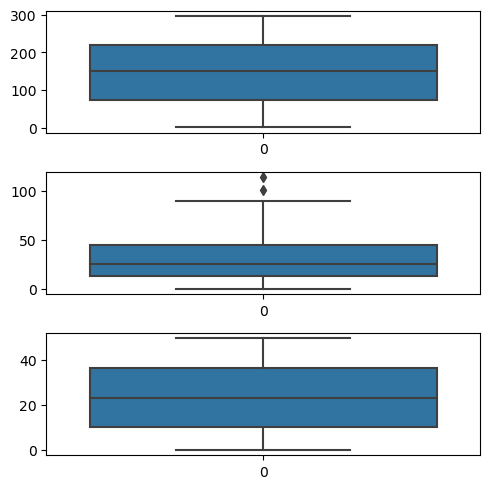

In [9]:
# Outlier Analysis
import seaborn as sns
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(data['TV'], ax = axs[0])
plt2 = sns.boxplot(data['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(data['Radio'], ax = axs[2])
plt.tight_layout()

# EDA

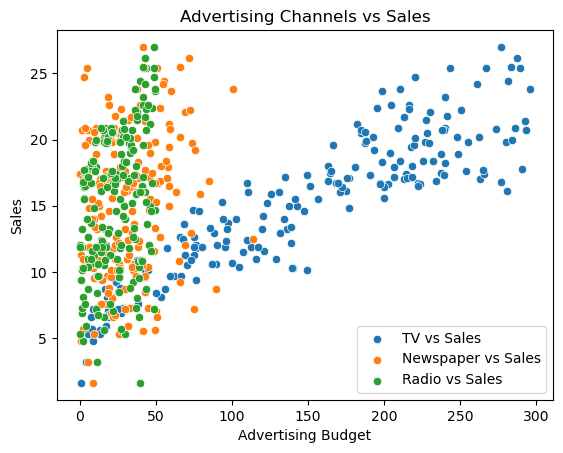

In [10]:
import seaborn as sns

tv=data['TV']
S=data['Sales']
n=data['Newspaper']
r=data['Radio']
sns.scatterplot(x=tv, y=S, label='TV vs Sales')

# Create a scatter plot for Newspaper vs Sales
sns.scatterplot(x=n, y=S, label='Newspaper vs Sales')

# Create a scatter plot for Radio vs Sales
sns.scatterplot(x=r, y=S, label='Radio vs Sales')

# Customize the plot
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Advertising Channels vs Sales')
plt.legend()
plt.show()

Univariate Analysis

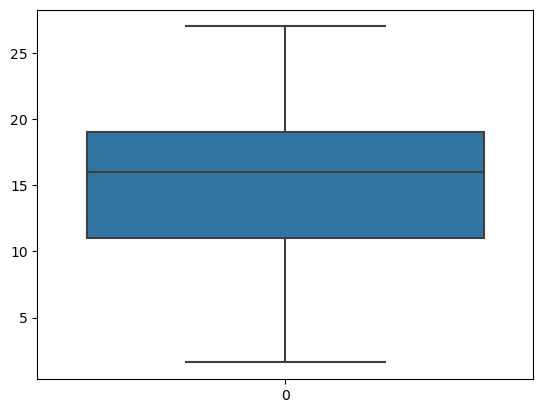

In [11]:
sns.boxplot(data['Sales'])
plt.show()


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


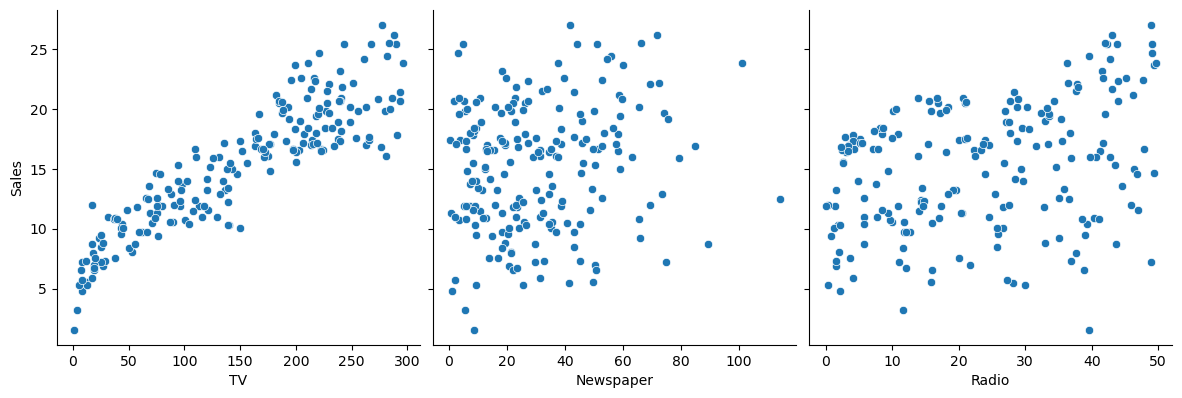

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

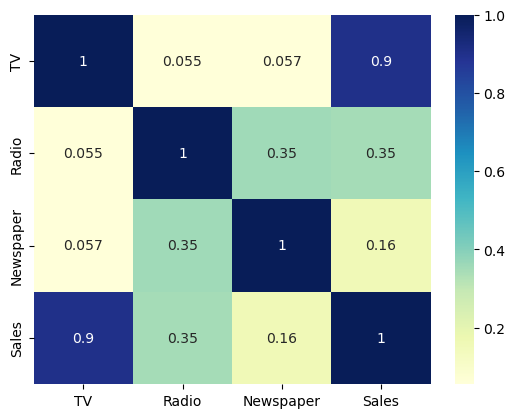

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Let's consider the sales of TV 

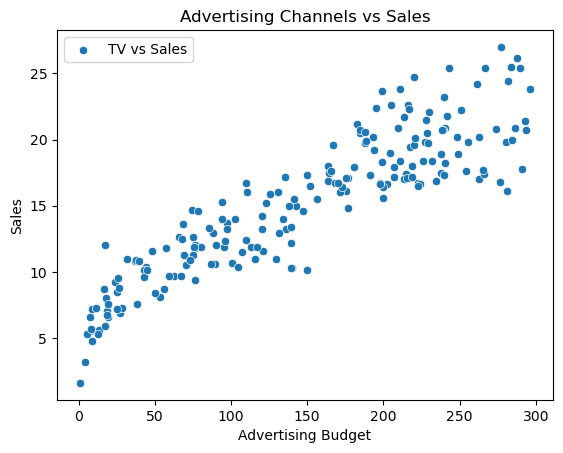

In [14]:
import seaborn as sns

tv=data['TV']
S=data['Sales']
sns.scatterplot(x=tv, y=S, label='TV vs Sales')
plt.xlabel('Advertising Budget')
plt.ylabel('Sales')
plt.title('Advertising Channels vs Sales')
plt.legend()
plt.show()

# Feature Extraction

In [16]:
x=data[['TV']].values
y=data['Sales'].values

In [17]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [18]:
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

# Splitting the data

In [20]:
from sklearn import preprocessing
x=preprocessing.StandardScaler().fit(x).transform(x)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

# Implementing the model 

In [22]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm

LinearRegression()

In [23]:
lm.fit(x_train,y_train)

LinearRegression()

In [24]:
y_pred=lm.predict(x_test)
y_pred

array([22.76575686, 11.92710513,  7.96367536, 16.75559161, 11.78575599,
       18.39524158, 18.11254331, 10.75673429, 19.03413968, 20.27801207,
       19.52038071, 15.709608  , 11.27689911, 10.3779186 , 21.84981446,
       11.11293411, 16.86301695, 14.30177061,  7.8110183 , 12.92785701,
       10.59276929, 14.44877371, 13.06355218,  7.33043123, 21.29572585,
       20.41370724, 13.81552958,  7.34173916,  8.30291329, 18.77405727,
       21.87243032, 17.17963902, 17.90334659, 19.42991726,  7.08731072,
       17.30968022, 19.7013076 , 22.72617911, 12.36811443, 16.09973162,
        9.88036964, 12.29461288, 11.07901032, 14.4996594 , 16.60858851,
       20.38543742, 18.70620968,  7.51701209, 12.66212064, 22.33040152])

# predicting the output

In [25]:
print(lm.predict([[52]]))

[266.95417737]


# Finding the intercept and coefficient of the best fit line

In [27]:
print('Intercept:',lm.intercept_)
print('Coeeficient:',lm.coef_)

Intercept: 15.16923025777867
Coeeficient: [4.84201821]


In [28]:
from sklearn import metrics
meanABErr=metrics.mean_absolute_error(y_test,y_pred)
meanSQErr=metrics.mean_squared_error(y_test,y_pred)
rootMeanErr=np.sqrt(metrics.mean_squared_error(y_test,y_pred))
r2sc=metrics.r2_score(y_test,y_pred)
print('Mean Absolute Error:',meanABErr)
print('Mean Squared Error:',meanSQErr)
print('Root Mean Squared Error:',rootMeanErr)
print('R2-Score:',r2sc)

Mean Absolute Error: 1.8601896811436023
Mean Squared Error: 5.7503870987844685
Root Mean Squared Error: 2.3979964759741557
R2-Score: 0.7639800166186093


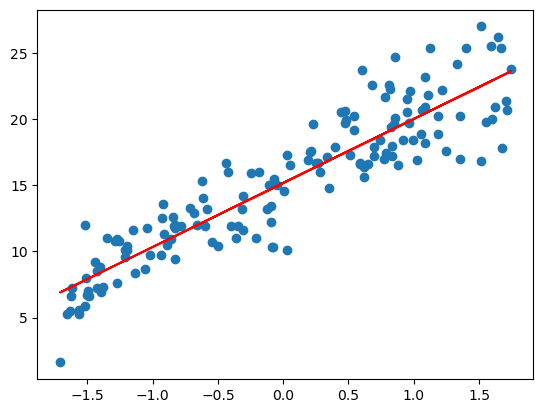

In [35]:
plt.scatter(x_train, y_train)
plt.plot(x_train,15.16923025777867 +4.84201821*x_train, 'r')
plt.show()